In [3]:
import pandas as pd 
import numpy as np 

df=pd.read_csv("SMSSpamCollection", sep="\t", header=None,names=['label','message'])
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#data analysis
print("---- any null values-----")
print(df.isnull().sum())
print("----unique values-----")
print(df.nunique())
print("---columns-----")
print(df.columns)
print("---descriptive statistics-----")
print(df.describe())


---- any null values-----
label      0
message    0
dtype: int64
----unique values-----
label         2
message    5169
dtype: int64
---columns-----
Index(['label', 'message'], dtype='object')
---descriptive statistics-----
       label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


In [5]:
df.duplicated().sum()

403

In [6]:
df=df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df['label_num']=encoder.fit_transform(df['label'])
print(df.head())

  label                                            message  label_num
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3   ham  U dun say so early hor... U c already then say...          0
4   ham  Nah I don't think he goes to usf, he lives aro...          0


In [10]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def clean_text(text):
    text=text.lower()
    text=re.sub(r'[^a-z\s]','',text)
    text=" ".join([word for word in text.split() if word not in stopwords.words('english')])
    return text

df['clean_text']=df['message'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
df.head()

,label,message,label_num,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,0,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah dont think goes usf lives around though


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector =TfidfVectorizer(max_features=3000)
x=vector.fit_transform(df['clean_text'])
y=df['label_num']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Initialize the model
nb_model = MultinomialNB()

# Step 2: Train the model
nb_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = nb_model.predict(X_test)

# Step 4: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.97678916827853

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       894
           1       0.99      0.84      0.91       140

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034


Confusion Matrix:
 [[893   1]
 [ 23 117]]


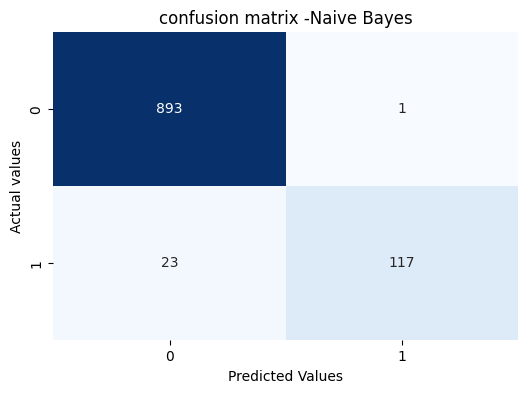

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import confusion_matrix 

cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.title('confusion matrix -Naive Bayes')
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
plt.show()


In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\nModel: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))



Model: Naive Bayes
Accuracy: 0.9768
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       894
           1       0.99      0.84      0.91       140

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034


Model: Logistic Regression
Accuracy: 0.9574
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       894
           1       0.97      0.71      0.82       140

    accuracy                           0.96      1034
   macro avg       0.96      0.85      0.90      1034
weighted avg       0.96      0.96      0.95      1034


Model: SVM
Accuracy: 0.9807
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       894
           1       0.98      0.88      0.92       140

    accuracy                           0.98      1034
   macro avg     

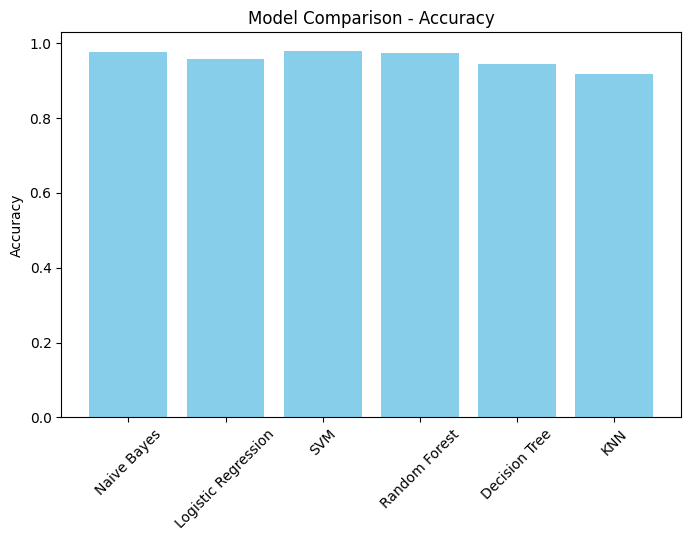

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()
